In [97]:
!pip install pdfminer

In [98]:
!pip install docx

In [99]:
!pip install pdf

In [100]:
!pip install python-docx

In [0]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import nltk
from subprocess import Popen, PIPE
from docx import Document
import pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from __future__ import (
    absolute_import, division, print_function, unicode_literals
)
import PyPDF2
from docx.document import Document as _Document
from docx.oxml.text.paragraph import CT_P
from docx.oxml.table import CT_Tbl
from docx.table import _Cell, Table
from docx.text.paragraph import Paragraph

import codecs
import glob
import logging
import os
import pprint
import re
import csv
import numpy as np
from nltk.corpus import stopwords
from nltk.tag.stanford import StanfordPOSTagger

from nltk.tokenize import sent_tokenize, word_tokenize

In [0]:
def iter_block_items(parent):
    """
    Generate a reference to each paragraph and table child within *parent*,
    in document order. Each returned value is an instance of either Table or
    Paragraph. *parent* would most commonly be a reference to a main
    Document object, but also works for a _Cell object, which itself can
    contain paragraphs and tables.
    """
    if isinstance(parent, _Document):
        parent_elm = parent.element.body
        # print(parent_elm.xml)
    elif isinstance(parent, _Cell):
        parent_elm = parent._tc
    else:
        raise ValueError("something's not right")

    for child in parent_elm.iterchildren():
        if isinstance(child, CT_P):
            yield Paragraph(child, parent)
        elif isinstance(child, CT_Tbl):
            yield Table(child, parent)

In [0]:
def document_to_text(filename, file_path):
    if filename[-4:] == ".doc":
        cmd = ['C:/antiword/antiword', file_path] #use antiword command
        p = Popen(cmd, stdout=PIPE)
        stdout, stderr = p.communicate()
        return stdout.decode('ascii', 'ignore')
    elif filename[-5:] == ".docx":
        doc = Document(file_path)
        fullText = []
        para_ix=0
        tbl_ix=0
        for block in iter_block_items(doc):
            block_type=block.__class__.__name__
            if block_type=='Table':
                for row in doc.tables[tbl_ix].rows:
                    for cell in row.cells:
                        for paracell in cell.paragraphs:
                            fullText.append(paracell.text)
                tbl_ix+=1
            elif block_type=='Paragraph':
                fullText.append(doc.paragraphs[para_ix].text)
                para_ix+=1
        return '\n'.join(fullText)
    elif filename[-4:] == ".odt":
        cmd = ['odt2txt', file_path]
        p = Popen(cmd, stdout=PIPE)
        stdout, stderr = p.communicate()
        return stdout.decode('ascii', 'ignore')
    elif filename[-4:] == ".pdf":
        return convert_pdf_to_txt(file_path)

In [0]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [0]:
def pdf_text(filename,filepath):
    st=[] 
    st1="" 
    pdf = PyPDF2.PdfFileReader(open(filename, "rb"))
    for page in pdf.pages:
        st.append(page.extractText())
        st1=listToString(st)
    return st1

In [0]:
def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr,codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    str1 = retstr.getvalue()
    retstr.close()
    return str1

In [0]:
def getcontent(filename,filepath):
    ext=os.path.basename(filename).split(".")[1]
    if ext=="pdf":
        content=pdf_text(filename,filepath)
        if content==' ':
          content=convert_pdf_to_txt(filepath)
    elif ext=="odt" or ext=="docx" or ext=="doc":
        content=document_to_text(filename,filepath)
    return content

In [0]:
def check(string,sub_string):
    if (string.find(sub_string)==-1):
        return 0
    else:
        return 1
    return

def sde_check(content,sdec):
    sdec=0
    sde=['software development','access','excel','system','operating system','os','unix','linux','software engineering','python','java developer','java','c++','c#','c','senior software engineer','senior developer','software developer','tester','coder','competative coding','programmer','junior developer','java developer','python developer','programming engineer','algorithmist','internship','project']
    for sd in sde:
        sdec=sdec+check(content,sd)
    return sdec

def ade_check(content,adec):
    adec=0
    ade=['android','backend','mobile','app','sdk','webapp','core java','android studio','dbms','database','database management system','android developer','application developer','app developer','flutter','xcode','ios development','ios developer','swift','macos','macosx','mac','ios']
    for ad in ade:
        adec=adec+check(content,ad)
    return adec        
    
def mldl_check(content,mldlc):
    mldlc=0
    mldl=['machine learning','kaggle','machine learning engineer','deep learning','r','anaconda','jupyter','spyder','google colaboratory','google colab','tensorflow','scipy','numpy','pandas','opencv','open cv','open-cv','computer vision','image processing','cnn','nltk','natural language processing','nlp','neural networks','linear regression','logistic regression','artificial intelligence','ai','ml','automation','cognitive automation','rnn','lstm','scikit learn','scikit','sklearn','keras','federated learning']
    for md in mldl:
        mldlc=mldlc+check(content,md)
    return mldlc

def dsa_check(content,dsac):
    dsac=0
    dsa=['data visualisation','data','data mining','access','excel','preprocessing','data preprocessing','dataframes','visualisation','data cleaning','data analysis','statistical analysis','statistics','graphs','supervised learning','unsupervised learning','data engineering','decision science','classification','regression','cross validation','clustering','a/b testing','hypothesis testing','error analysis','data models','data warehouse','hadoop','bigdata','apache spark','matlab','d3.js','tableau','matplotlib','scikit learn','scikit','sklearn','keras','wekea']
    for ds in dsa:
        dsac=dsac+check(content,ds)
    return dsac

def webd_check(content,webdc):
    webdc=0
    webd=['html','asp','.net','xml','access','excel','server','dbms','database','database management system','client','xampp','css','html5','javascript','js','angularjs','react','redux','reactjs','angular','angular.js','react.js','flask','django','php','j2eee','frontend','frontend development','frontend developer','backend','backend development','backend developer','j2eee','nodejs','node.js','dbms','sql','mysql','oracle','mongodb','web developer','web development','web','server','net','table']
    for wbd in webd:
        webdc=webdc+check(content,wbd)
    return webdc

def g_check(content,gc):
    gc=0
    graphics=['adobe tools','adobe','ps','photoshop','illustrator','graphic designer','graphics designer','content creator','wordpress','wacom','visual css tools','picmarker','graphic designing']
    for gphs in graphics:
        gc=gc+check(content,gphs)
    return gc   


In [0]:
def skill_tagger(text):
    content=text
    sdec=0
    adec=0
    mldlc=0
    dsac=0
    webdc=0
    gc=0

    sdec=sde_check(content,sdec)
    adec=ade_check(content,adec)
    mldlc=mldl_check(content,mldlc)
    dsac=dsa_check(content,dsac)
    webdc=webd_check(content,webdc)
    gc=g_check(content,gc)

    overview(adec,sdec,mldlc,webdc,gc,dsac)

In [0]:
def overview(adec,sdec,mldlc,webdc,gc,dsac):   
    Dict={}
    Dict = dict([('App Development',adec), ('General Software Development',sdec),('Machine Learning/Deep Learning',mldlc),('Data Science and Analysis',dsac),('Web Development',webdc),('Graphic Designing',gc)])
    for w in Dict:
        print(w,':',Dict[w])
        print()
        print()
    objects = ('App_Dev', 'Software_Dev','ML/DL', 'Data Science/Analysis', 'Web_Dev','Graphics' )
    y_pos = np.arange(len(objects))
    performance = [adec,sdec,mldlc,dsac,webdc,gc]

    plt.barh(y_pos, performance, align='center', alpha=1)
    plt.yticks(y_pos, objects)
    plt.xlabel('Skill_Meter')
    plt.title('Domain analysis')
    plt.rcParams['figure.figsize']=(11,6)
    plt.show()

In [0]:
def wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# ***Now defining the actual main function where we will pass the individual Resumes for screening***

In [0]:
def main(filename,filepath):
    text=getcontent(filename,filepath)
    text=text.lower()
    print(text)
    skill_tagger(text)
    wordcloud(text)

 
7, rani branch road, 
 kolkata-700002 
github-
 
technical experience 

https://github.com/i-m-sankha16 

 

projects  

  sankha banerjee 

                           +91 9163703517 
sankhabanerjee16@gmail.com  

● imdb movie review system
implemented a deep learning system for 
 
-

sentiment analysis using word embedding and convolutional neural 
network on keras based on the imdb movie review dataset. 

● mnist digit/fashion recognizer- 

built a neural network on classic mnist 

dataset. 

● animal classifier
learning in keras. 

tensorflow. 

- built a cat vs dog image classifier using transfer 

● neural style transfer

- implementation of neural style transfer with 

● credit card fraud detection

- analysis and modelling based on kaggle 

dataset on credit card fraud detection. 

● eye gesture recognition and understanding using open cv

- on a 
pre-recorded video of eye movement, recognized eye gesture and 
understood simple direction messages. 

● face recognition using op

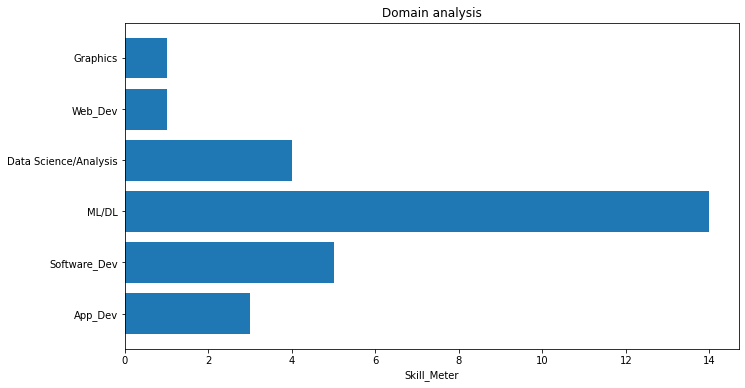

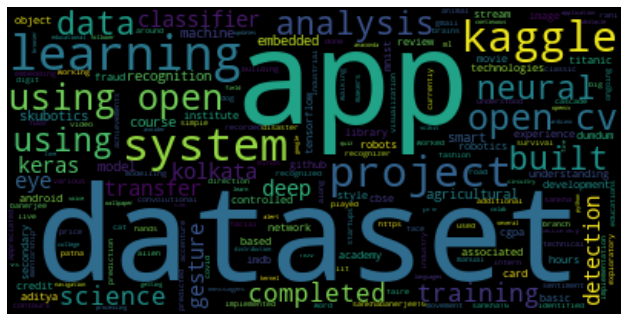

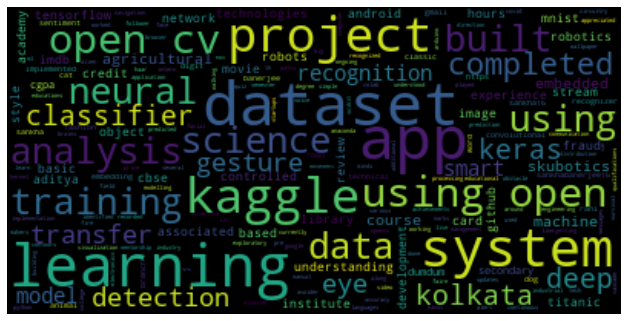

In [114]:
filepath="/content/Sankha_Banerjee_CVF.pdf"
filename="Sankha_Banerjee_CVF.pdf"
#print(filename)
main(filename,filepath)
